## HW6 Sentiment Analysis and Word Cloud Final

In [1]:
# Step 1: Install and Import Libraries

In [2]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 20.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 12.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 80.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=a040bd5246c4a304dc39911b74ae454679a226e61c78620a31241c653ee6f0b7
  Stored in directory: /home/ec2-user/.cache/pip/wheels/62/4a/9c/7a46699df9efb845aa116fae5e52d8690fc442fef6d32213f7


In [3]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...


True

In [4]:
# Authentication
consumerKey = "dsqdagzypVWUc2tf4X5RM6dTb"
consumerSecret = "EFu6YsXBkKciE4FNkB0n7gD5ZzQGLVTGlwHyN5YSuuomBnjEsv"
accessToken = "1651651171172360211-YYlzqjjesfVDs1wcTNKr94rYvEYokE"
accessTokenSecret = "UvGOZHg4qdO9XChLYIkQJzB47PVedYq98A4D9wCyOp0ra"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [5]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []



for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search: UCM
Please enter how many tweets to analyze: 200


In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  200
positive number:  34
negative number:  18
neutral number:  148


In [7]:
tweet_list

,0
0,Patti LuPone diz que ainda está se familiariza...
1,RT @BelenLiedo: En este hilo explico mi tesis ...
2,"De estatura un poco más alta que lo usual, sim..."
3,@marcosbompart https://t.co/SrA2bQ2QyZ
4,@QuidVacuo Posiblemente se quede en el ucm has...
...,...
195,RT @REIMrevista: La actividad ha sido coordina...
196,"RT @ucm_educacion: El próximo 04/05, a las 13:..."
197,"@EnMexicoMagico Varias del UCM, Kill Bill, The..."
198,"Si a Hector, quién difícilmente le gusta lo nu..."


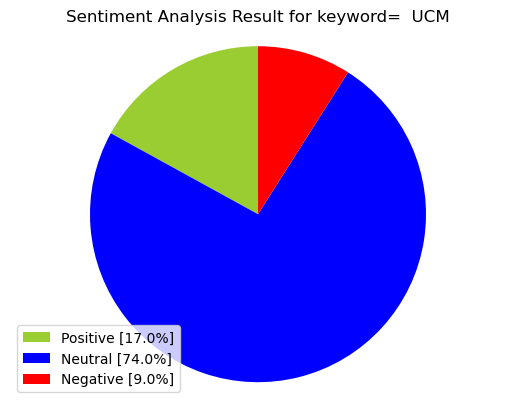

In [8]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [9]:
tweet_list.drop_duplicates(inplace = True)

In [10]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,Patti LuPone diz que ainda está se familiariza...,Patti LuPone diz que ainda está se familiariza...
1,RT @BelenLiedo: En este hilo explico mi tesis ...,RT @BelenLiedo: En este hilo explico mi tesis ...
2,"De estatura un poco más alta que lo usual, sim...","De estatura un poco más alta que lo usual, sim..."
3,@marcosbompart https://t.co/SrA2bQ2QyZ,@marcosbompart https://t.co/SrA2bQ2QyZ
4,@QuidVacuo Posiblemente se quede en el ucm has...,@QuidVacuo Posiblemente se quede en el ucm has...
...,...,...
193,RT @MarvelLatin: #GuardiansOfTheGalaxyVol3 es ...,RT @MarvelLatin: #GuardiansOfTheGalaxyVol3 es ...
196,"RT @ucm_educacion: El próximo 04/05, a las 13:...","RT @ucm_educacion: El próximo 04/05, a las 13:..."
197,"@EnMexicoMagico Varias del UCM, Kill Bill, The...","@EnMexicoMagico Varias del UCM, Kill Bill, The..."
198,"Si a Hector, quién difícilmente le gusta lo nu...","Si a Hector, quién difícilmente le gusta lo nu..."


In [11]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,Patti LuPone diz que ainda está se familiariza...,patti lupone diz que ainda est se familiariza...
1,RT @BelenLiedo: En este hilo explico mi tesis ...,en este hilo explico mi tesis para el concurs...
2,"De estatura un poco más alta que lo usual, sim...",de estatura un poco m s alta que lo usual sim...
3,@marcosbompart https://t.co/SrA2bQ2QyZ,
4,@QuidVacuo Posiblemente se quede en el ucm has...,posiblemente se quede en el ucm hasta secret...
5,@brucebatman007 Existe el multiverso en el UCM...,existe el multiverso en el ucm asi q cualqu...
6,"@Spidey_UCM nuestra nueva costumbre, terminar ...",ucm nuestra nueva costumbre terminar en bici
7,Casi todas las películas y series del UCM desd...,casi todas las pel culas y series del ucm desd...
8,@JohnJokewriter @freshwaterpurl @cindyk2000 @h...,ucm
9,RT @TheJuSSB: UCM PR this Spring! Thanks to ev...,ucm pr this spring thanks to everyone who ma...


In [12]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_14016/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,Patti LuPone diz que ainda está se familiariza...,patti lupone diz que ainda est se familiariza...,0.00,0.00,neutral,0.000,1.000,0.000,0.0000
1,RT @BelenLiedo: En este hilo explico mi tesis ...,en este hilo explico mi tesis para el concurs...,0.00,0.00,neutral,0.000,1.000,0.000,0.0000
2,"De estatura un poco más alta que lo usual, sim...",de estatura un poco m s alta que lo usual sim...,-0.25,0.25,negative,0.091,0.909,0.000,-0.2732
3,@marcosbompart https://t.co/SrA2bQ2QyZ,,0.00,0.00,neutral,0.000,0.000,0.000,0.0000
4,@QuidVacuo Posiblemente se quede en el ucm has...,posiblemente se quede en el ucm hasta secret...,-0.40,0.70,negative,0.175,0.825,0.000,-0.5574
5,@brucebatman007 Existe el multiverso en el UCM...,existe el multiverso en el ucm asi q cualqu...,0.00,0.00,neutral,0.000,1.000,0.000,0.0000
6,"@Spidey_UCM nuestra nueva costumbre, terminar ...",ucm nuestra nueva costumbre terminar en bici,0.00,0.00,neutral,0.000,1.000,0.000,0.0000
7,Casi todas las películas y series del UCM desd...,casi todas las pel culas y series del ucm desd...,0.00,0.00,neutral,0.000,1.000,0.000,0.0000
8,@JohnJokewriter @freshwaterpurl @cindyk2000 @h...,ucm,0.00,0.00,neutral,0.000,1.000,0.000,0.0000
9,RT @TheJuSSB: UCM PR this Spring! Thanks to ev...,ucm pr this spring thanks to everyone who ma...,0.20,0.20,positive,0.000,0.714,0.286,0.8126


In [13]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [14]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [15]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,102,67.11
positive,32,21.05
negative,18,11.84


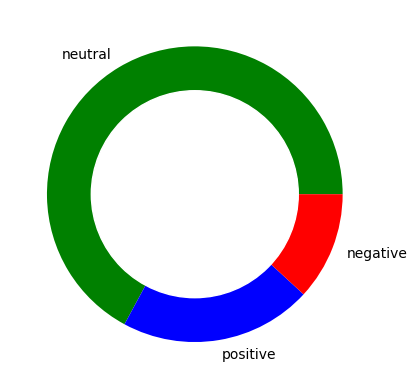

In [16]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [17]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



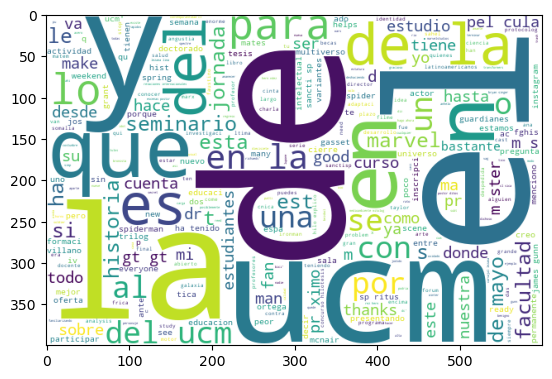

In [18]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

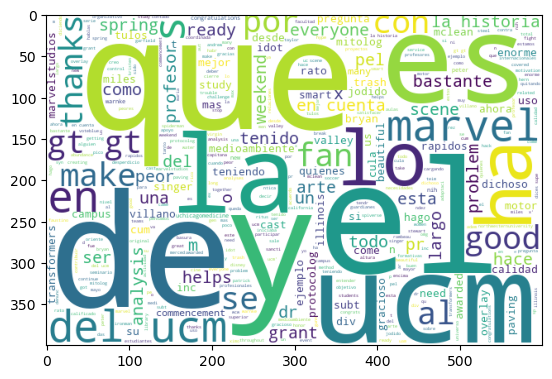

In [19]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

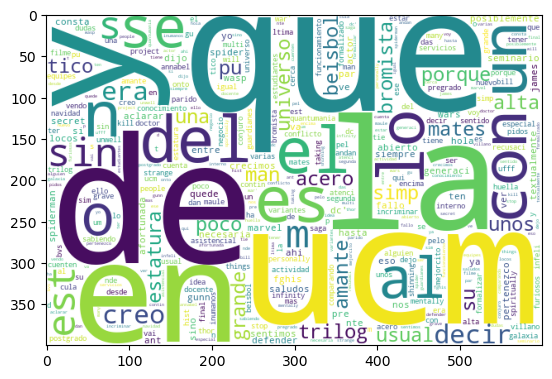

In [20]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

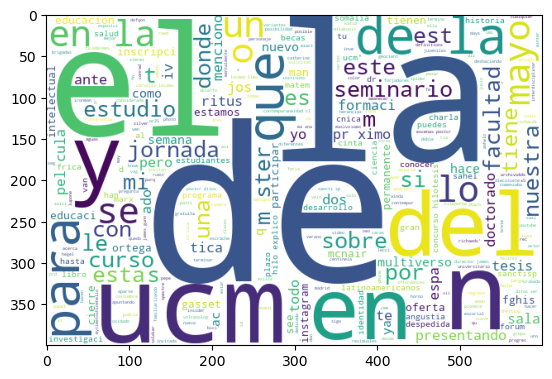

In [21]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)